In [181]:
#%matplotlib inline
import d2lzh as d2l
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

(1, 28, 28)


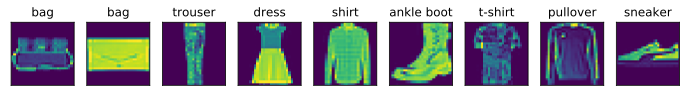

In [182]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

for X, y in train_iter:
    print(X[0].shape)
    d2l.show_fashion_mnist(X[0:9], d2l.get_fashion_mnist_labels(y.asnumpy()))
    break

In [183]:
net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [184]:
loss = gloss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.02})


In [185]:
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)


epoch 1, loss 1.1518, train acc 0.670, test acc 0.738
epoch 2, loss 0.7777, train acc 0.755, test acc 0.774
epoch 3, loss 0.6930, train acc 0.780, test acc 0.789
epoch 4, loss 0.6471, train acc 0.794, test acc 0.800
epoch 5, loss 0.6167, train acc 0.802, test acc 0.808


In [186]:
for k, v in net.collect_params().items():
    print(f'key: {k}')
    print(v.data())

key: dense8_weight

[[ 2.26359814e-04  3.87558830e-03  8.86982214e-03 ... -1.81533936e-02
  -1.11671798e-02 -1.16943754e-03]
 [ 6.98439602e-04  1.71250023e-03 -5.48024615e-03 ... -6.29156269e-03
  -1.42047480e-02  3.16298567e-03]
 [-2.34175310e-03  1.04863271e-02 -1.46038020e-02 ...  1.02324113e-02
  -9.91855562e-03 -1.48382259e-03]
 ...
 [-7.86321051e-03 -1.02537367e-02 -1.53267756e-02 ...  2.18285318e-03
   1.95865217e-03  1.09617617e-02]
 [-1.93738821e-03  1.63590610e-02 -5.68500138e-04 ... -2.38137525e-02
  -2.61877221e-03 -1.27546759e-02]
 [-4.06893063e-03 -1.58822387e-02  1.26546575e-02 ... -1.09821390e-02
  -2.22903436e-05 -4.62426199e-03]]
<NDArray 10x784 @cpu(0)>
key: dense8_bias

[ 0.02265789 -0.00564504 -0.05600878 -0.00816339 -0.22510761  0.57618546
  0.06948674 -0.0216289  -0.13889602 -0.21288075]
<NDArray 10 @cpu(0)>


In [187]:
import numpy as np
#run the net, output result
def run_net(X: list, net):
    return net(X).argmax(1)

def count_err(yhat, y):
    #count the number of the incorrect labels
    #params:
    # yhat: indices list of the labels
    return np.count_nonzero((yhat == y) == False)

print('Error rate summary: ')
num_errs, num_total = 0, 0
for X, y in test_iter:
    yhat = run_net(X, net)
#     print(f'y: {y}, \nyhat: {yhat}')
    curr_errs = count_err(run_net(X, net).asnumpy(), y.asnumpy())
    num_imgs = len(X)
    num_errs += curr_errs
    num_total += num_imgs
    print(f'curr_err: {curr_errs}, num_img: {num_imgs} err_rate: {curr_errs / float(num_imgs)}')
print(f'total error rate: {num_errs / num_total}')
    

Error rate summary: 
curr_err: 45, num_img: 256 err_rate: 0.17578125
curr_err: 44, num_img: 256 err_rate: 0.171875
curr_err: 48, num_img: 256 err_rate: 0.1875
curr_err: 38, num_img: 256 err_rate: 0.1484375
curr_err: 49, num_img: 256 err_rate: 0.19140625
curr_err: 48, num_img: 256 err_rate: 0.1875
curr_err: 59, num_img: 256 err_rate: 0.23046875
curr_err: 54, num_img: 256 err_rate: 0.2109375
curr_err: 53, num_img: 256 err_rate: 0.20703125
curr_err: 51, num_img: 256 err_rate: 0.19921875
curr_err: 53, num_img: 256 err_rate: 0.20703125
curr_err: 47, num_img: 256 err_rate: 0.18359375
curr_err: 51, num_img: 256 err_rate: 0.19921875
curr_err: 56, num_img: 256 err_rate: 0.21875
curr_err: 42, num_img: 256 err_rate: 0.1640625
curr_err: 44, num_img: 256 err_rate: 0.171875
curr_err: 35, num_img: 256 err_rate: 0.13671875
curr_err: 53, num_img: 256 err_rate: 0.20703125
curr_err: 44, num_img: 256 err_rate: 0.171875
curr_err: 65, num_img: 256 err_rate: 0.25390625
curr_err: 54, num_img: 256 err_rate: 0.